# Warsztaty Badawcze
## Praca domowa 1
*Marcel Witas*

In [1]:
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Wczytanie zbioru danych
Dane pochodzą z amerykańskich szpitali. Dotyczą pacjentów, którym została zdiagnozowana cukrzyca, byli w szpitalu co najmniej 1 dzień, a maksymalnie 14 dni, podczas ich pobytu przeprowadzono testy laboratoryjne oraz podanawano leki. Zmienną objaśnianą jest *readmitted*, która mówi, czy pacjent trafił do szpitala drugi raz.

In [2]:
diabetes_df = pd.read_csv("dataset_diabetes\diabetic_data.csv")
diabetes_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Preprocessing

#### Zmienna objaśniana

In [3]:
diabetes_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Zmienna *readmitted* przyjmuje wartości "NO", ">30", "<30", a zatem został rozróżniony czas, po którym dana osoba trafiała do szpitala ponownie. Nas interesuje jedynie fakt, czy trafiła tam ponownie, zatem możemy przekształcić:

In [4]:
diabetes_df['readmitted'] = [0 if x == 'NO' else 1 for x in diabetes_df['readmitted']]

In [5]:
diabetes_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [6]:
 diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Teoretycznie zbiór danych nie zawiera braków. W rzeczywistości są jednak one zapisane w inny sposób, np. "?".

### Zmienne Numeryczne

In [7]:
df_num = diabetes_df.select_dtypes(include=[np.number])
df_num.drop('encounter_id', axis=1,inplace=True)
df_num.drop('patient_nbr', axis=1,inplace=True)
df_num.drop('discharge_disposition_id', axis=1,inplace=True)
df_num.drop('admission_source_id', axis=1,inplace=True)
df_num.drop('admission_type_id', axis=1,inplace=True)
df_num.drop('readmitted', axis=1,inplace=True)
df_num

C:\Users\mwita\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9
101762,5,33,3,18,0,0,1,9
101763,1,53,0,9,1,0,0,13
101764,10,45,2,21,0,0,1,9


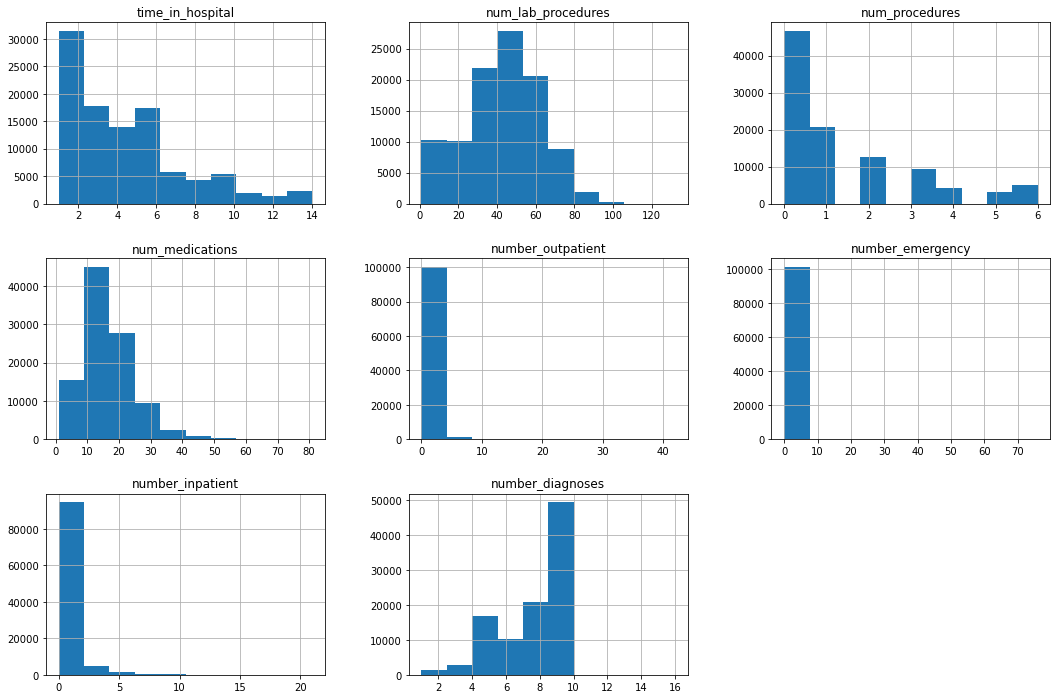

In [8]:
df_num.hist( figsize=(18, 12))

plt.show()

Zmienne przyjmują tylko wartości całkowite, num_lab_provedures i num_medications mają rozkład zbliżony do normalnego.
#### Korelacje

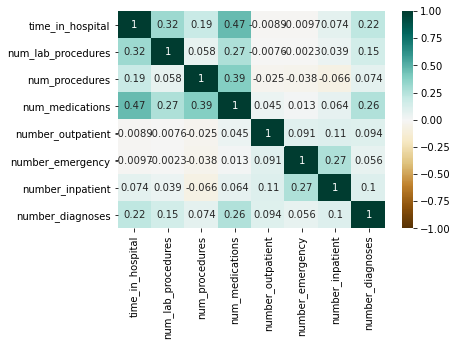

In [9]:
heatmap = sns.heatmap(df_num.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

### Zmienne  kategoryczne

#### Weight

In [10]:
 diabetes_df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Ponieważ kolumna *weight* zawiera powyżej 97% braków danych, możemy ją usunąć.
Kolejne kolumny, które zawierają sporo braków danych, to *Payer code* i *Medical specialty*.

In [11]:
diabetes_df.drop('weight', axis=1, inplace=True)

#### Payer Code

Przyjrzyjmy się kolumnie *payer_code*, która zawiera ponad 50% braków danych, zanim ją usuniemy, sprawdźmy, czy mogła mieć wpływ na ponowne przyjęcie do szpitala, np. czy self-pay byli przyjmowani ponownie rzadziej?

0.4751348112642301


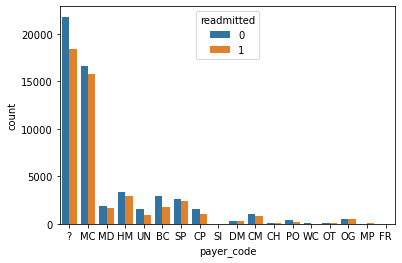

In [12]:
print(diabetes_df.loc[diabetes_df['payer_code'] == 'SP','readmitted'].mean())
sns.countplot(x = 'payer_code', data = diabetes_df, hue='readmitted')
plt.show()

Jak widać, zmienna raczej nie miała wpływu na zmienną objaśnianą, zatem możemy ją usunąć.

In [13]:
diabetes_df.drop('payer_code', axis=1, inplace=True)

In [14]:
diabetes_df.loc[diabetes_df['medical_specialty'] == '?','medical_specialty'].count() / diabetes_df.loc[:,'medical_specialty'].count()

0.49082208203132677

In [15]:

diabetes_df['medical_specialty'].value_counts()
# v = ['InternalMedicine',                     
# 'Emergency/Trauma',                     
# 'Family/GeneralPractice',
# 'Cardiology', 'Pediatry' ]
# df = diabetes_df.loc[diabetes_df['medical_specialty'].isin(v),:]
# sns.countplot(x = 'medical_specialty', data = df, hue='readmitted')
# plt.show()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
Speech                               1
Proctology                           1
Psychiatry-Addictive                 1
Pediatrics-InfectiousDiseases        1
SportsMedicine                       1
Name: medical_specialty, Length: 73, dtype: int64

In [16]:
diabetes_df.drop('medical_specialty', axis=1, inplace=True)

#### Admission type

In [17]:
diabetes_df.loc[diabetes_df['admission_type_id'] == 4]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2043,13169532,20191257,Caucasian,Male,[50-60),4,1,4,2,56,...,No,Steady,No,No,No,No,No,No,Yes,0
2203,14369772,59902119,Caucasian,Male,[80-90),4,1,4,2,46,...,No,Steady,No,No,No,No,No,No,Yes,1
2461,16168812,21564738,AfricanAmerican,Male,[70-80),4,6,4,5,73,...,No,Up,No,No,No,No,No,Ch,Yes,0
4823,26323434,20593143,Caucasian,Female,[60-70),4,6,4,2,39,...,No,Steady,No,No,No,No,No,No,Yes,1
35877,110766078,2177469,AfricanAmerican,Male,[60-70),4,1,14,3,66,...,No,Steady,No,No,No,No,No,No,Yes,0
47548,146024844,58776723,Hispanic,Male,[40-50),4,1,7,6,39,...,No,No,No,No,No,No,No,No,No,0
48711,148261332,217206,Caucasian,Female,[70-80),4,6,1,4,37,...,No,No,No,No,No,No,No,Ch,Yes,1
80354,247730952,20103048,Hispanic,Female,[0-10),4,1,1,2,27,...,No,No,No,No,No,No,No,No,No,0
87714,280652286,33119388,Caucasian,Male,[60-70),4,1,4,3,28,...,No,Steady,Steady,No,No,No,No,Ch,Yes,0
100721,429690494,115019244,Asian,Male,[80-90),4,6,7,3,51,...,No,No,No,No,No,No,No,No,Yes,0


Są to prawdopodobnie błędne dane (wiek się nie zgadza).

In [18]:
diabetes_df.drop(diabetes_df[diabetes_df['admission_type_id'] == 4].index, inplace = True)

In [19]:
diabetes_df['admission_type_id'] = [4 if x >4 else x for x in diabetes_df['admission_type_id']]
dictio = {1 : "Emergency", 
          2: "Urgent",
          3: "Elective", 
         4 : "Unknown/other"}


diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(dictio)

In [20]:
diabetes_df['admission_type_id'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
Unknown/other    10417
Name: admission_type_id, dtype: int64

In [21]:
#One hot

#### Change

In [22]:
diabetes_df['change'] = [0 if x == 'No' else 1 for x in diabetes_df['change']]

#### Diabetes medications

In [23]:
diabetes_df['diabetesMed'] = [0 if x == 'No' else 1 for x in diabetes_df['diabetesMed']]

#### Race

In [24]:
#diabetes_df.drop(diabetes_df[diabetes_df['race'] == "?"].index, inplace=True)
diabetes_df['race'] = [ 'Unknown' if (x == '?' )  else x for x in diabetes_df['race']]

In [25]:
diabetes_df['race'] = [ x if (x == 'Caucasian' or x =='AfricanAmerican')  else 'Other' for x in diabetes_df['race']]
# sns.countplot(x = 'race', data = diabetes_df, hue='readmitted')
# plt.show()


In [26]:
diabetes_df['race'].value_counts()

Caucasian          76094
AfricanAmerican    19208
Other               6454
Name: race, dtype: int64

#### Drugs

W ramce danych mamy 24 zmienne odpowiadające lekom przyjmowanym przez pacjentów, które przyjumują 4 wartości.

In [27]:
dictio = {"No" : 0, 
          "Down" : 1,
          "Steady": 2, 
         "Up" : 3}

Skorzystamy z tego, że kolumny te zaczynają się od 'metformin', i jest ich 24.

In [28]:
i = diabetes_df.columns.get_loc('metformin')
drugs_col = diabetes_df.columns[i:i+23]
drugs_col

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')

In [29]:
for name in drugs_col:
    diabetes_df[name] = diabetes_df[name].replace(dictio)

In [30]:
diabetes_df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown/other,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),Emergency,1,7,3,59,...,0,3,0,0,0,0,0,1,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,1,7,2,11,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,Caucasian,Male,[30-40),Emergency,1,7,2,44,...,0,3,0,0,0,0,0,1,1,0
4,16680,42519267,Caucasian,Male,[40-50),Emergency,1,7,1,51,...,0,2,0,0,0,0,0,1,1,0


#### Encounter id i patient number

In [31]:
 diabetes_df['encounter_id'].value_counts()

77856768     1
60056922     1
279188820    1
264404190    1
96928116     1
            ..
316096226    1
390757988    1
109989474    1
241154934    1
96210942     1
Name: encounter_id, Length: 101756, dtype: int64


Zmienne unikalne, czyli id pacjenta i wizyty, możemy usunąć, gdyż model mógłby je traktować jako numeryczne.

In [32]:
diabetes_df.drop('encounter_id', axis=1, inplace=True)
diabetes_df.drop('patient_nbr', axis=1, inplace=True)

#### Gender

In [33]:
diabetes_df['gender'].value_counts()

Female             54705
Male               47048
Unknown/Invalid        3
Name: gender, dtype: int64

In [34]:
diabetes_df.drop(diabetes_df[diabetes_df['gender'] == "Unknown/Invalid"].index, inplace = True)
diabetes_df['gender'] = [0 if x == 'Female' else 1 for x in diabetes_df['gender']]

#### Age

In [35]:
diabetes_df['age'].value_counts()

[70-80)     26064
[60-70)     22479
[50-60)     17255
[80-90)     17195
[40-50)      9684
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        160
Name: age, dtype: int64

In [36]:
diabetes_df['age'] = [int(re.findall(r'\d+', x)[0])+5 for x in diabetes_df['age']]

#### Discharge disposition	

In [37]:
diabetes_df['discharge_disposition_id'].value_counts()

1     60226
3     13954
6     12898
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

Połączmy NULL, Not Mapped, Unknown/Invalid w jedną kategorię. Następnie wartości występujące rzadziej niż 1000 również w jedną.

In [38]:
diabetes_df['discharge_disposition_id'] = [0 if (x == 25 or x == 26 or x==18) else x for x in diabetes_df['discharge_disposition_id']]

In [39]:
def getOthers(a, feature):
    rares = feature.value_counts() < a
    return feature.apply(lambda x: 30 if rares[x] else x)

diabetes_df['discharge_disposition_id'] = getOthers(200, diabetes_df['discharge_disposition_id'])

#### Admission source

In [40]:
diabetes_df['admission_source_id'].value_counts()

7     57490
1     29562
17     6781
4      3182
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
25        2
13        1
14        1
Name: admission_source_id, dtype: int64

In [41]:
diabetes_df['admission_source_id'] = [0 if (x==9 or x == 17 or x == 20 or x==21) else x for x in diabetes_df['admission_source_id']]

In [42]:
diabetes_df['admission_source_id'] = getOthers(200, diabetes_df['admission_source_id'])

#### Diagnosis 1,2,3	

In [43]:
diabetes_df['diag_1'] = ['0' if (x.find('E') !=-1 or x.find('V')!=-1 or x=='?') else x for x in diabetes_df['diag_1']]

In [44]:
diabetes_df['diag_2'] = ['0' if (x.find('E') !=-1 or x.find('V')!=-1 or x=='?') else x for x in diabetes_df['diag_2']]
diabetes_df['diag_3'] = ['0' if (x.find('E') !=-1 or x.find('V')!=-1 or x=='?') else x for x in diabetes_df['diag_3']]

In [45]:
def set_group(x):
    if x >= 140 and x <= 239:
        return 'Neoplasms'
    elif x >= 250 and x <= 251:
        return 'Diabetes'
    elif x >= 390 and x <= 459 or x== 785:
        return 'Circulatory'
    elif x <=519 or x== 786:
        return 'Respiratory'
    elif x <= 579 or x== 787:
        return 'Digestive'
    elif x <= 629 or x== 788:
        return 'Genitourinary'
    elif x >= 710 and x <= 739:
        return 'Musculoskeletal'
    elif x >= 800 and x <= 999:
        return 'Injury'
    else:
        return "Other"
    
def diag_transform(col):
    column = col.apply(lambda x: float(x))
    return column.apply(set_group)

diabetes_df['diag_1'] = diag_transform(diabetes_df['diag_1'])    


In [46]:
diabetes_df['diag_2'] = diag_transform(diabetes_df['diag_2'])    
diabetes_df['diag_3'] = diag_transform(diabetes_df['diag_3'])    

In [47]:
diabetes_df['diag_1'].value_counts()

Circulatory        30433
Respiratory        26117
Digestive           9474
Diabetes            8771
Injury              6971
Other               6481
Genitourinary       5117
Musculoskeletal     4956
Neoplasms           3433
Name: diag_1, dtype: int64

#### Glucose serum test result

In [48]:
diabetes_df['max_glu_serum'].value_counts()

None    96407
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

Ponieważ w ponad 94000 rekordów test nie był robiony, możemy usunąć kolumnę.

In [49]:
diabetes_df.drop('max_glu_serum', axis=1, inplace=True)

#### A1c test result

In [50]:
diabetes_df['A1Cresult'].value_counts()

None    84737
>8       8216
Norm     4990
>7       3810
Name: A1Cresult, dtype: int64

#### One hot encoding

In [51]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101753 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101753 non-null  object
 1   gender                    101753 non-null  int64 
 2   age                       101753 non-null  int64 
 3   admission_type_id         101753 non-null  object
 4   discharge_disposition_id  101753 non-null  int64 
 5   admission_source_id       101753 non-null  int64 
 6   time_in_hospital          101753 non-null  int64 
 7   num_lab_procedures        101753 non-null  int64 
 8   num_procedures            101753 non-null  int64 
 9   num_medications           101753 non-null  int64 
 10  number_outpatient         101753 non-null  int64 
 11  number_emergency          101753 non-null  int64 
 12  number_inpatient          101753 non-null  int64 
 13  diag_1                    101753 non-null  object
 14  diag

In [52]:

one_hot_features = ['race', 'admission_type_id', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult',
       'discharge_disposition_id', 'admission_source_id']

Użyjemy poniższej funkcji:

In [53]:

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [54]:
diabetes_df = dummy_df(diabetes_df, one_hot_features)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101753 entries, 0 to 101765
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   gender                           101753 non-null  int64
 1   age                              101753 non-null  int64
 2   time_in_hospital                 101753 non-null  int64
 3   num_lab_procedures               101753 non-null  int64
 4   num_procedures                   101753 non-null  int64
 5   num_medications                  101753 non-null  int64
 6   number_outpatient                101753 non-null  int64
 7   number_emergency                 101753 non-null  int64
 8   number_inpatient                 101753 non-null  int64
 9   number_diagnoses                 101753 non-null  int64
 10  metformin                        101753 non-null  int64
 11  repaglinide                      101753 non-null  int64
 12  nateglinide                   

#### Analiza jednowymiarowa

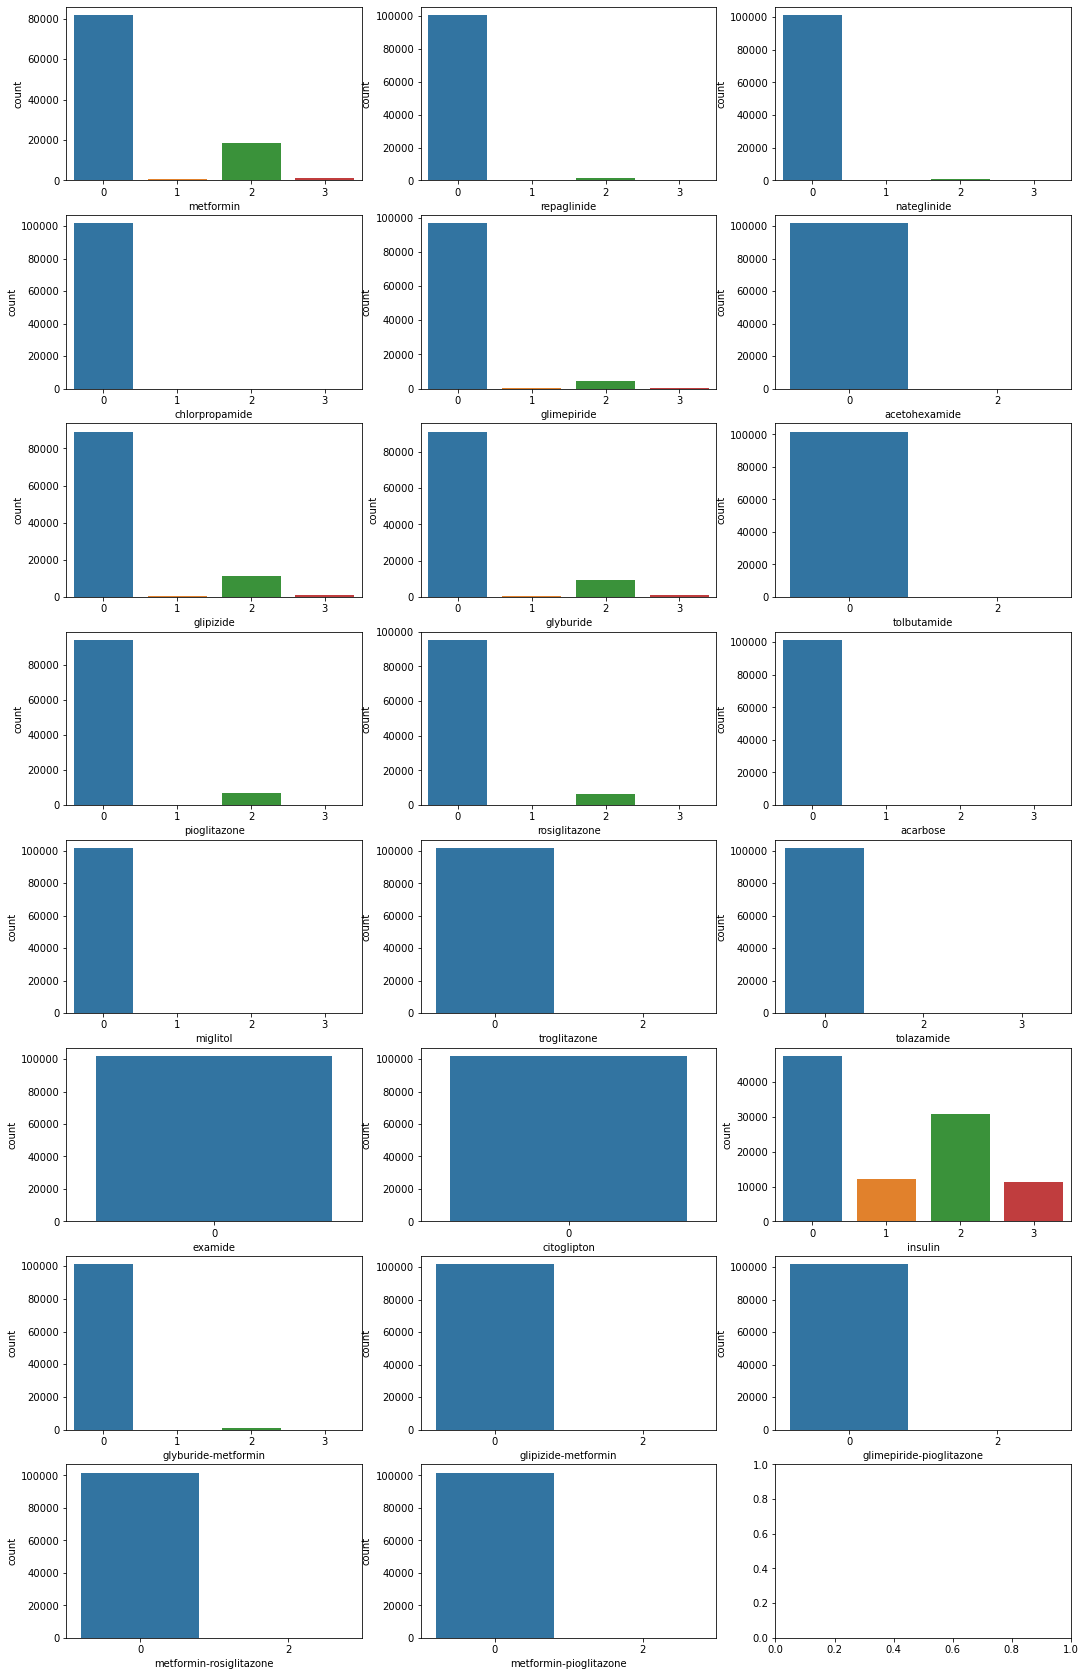

In [55]:
fig, ax = plt.subplots(8,3, figsize = (18,30))
for i in range(10, 33):
    sns.countplot(data = diabetes_df, x = diabetes_df.columns[i],  ax = ax[(i-10)//3, (i-10)%3])
    

Zauważmy, że w niektórych kolumnach przeważa zdecydowanie jedna zmienna, zatem możemy je usunąć.

In [56]:
diabetes_df = diabetes_df.drop(['repaglinide', 'nateglinide', 'chlorpropamide',
        'acetohexamide', 'tolbutamide',
        'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis = 1)

### Od czego zależy readmitted?

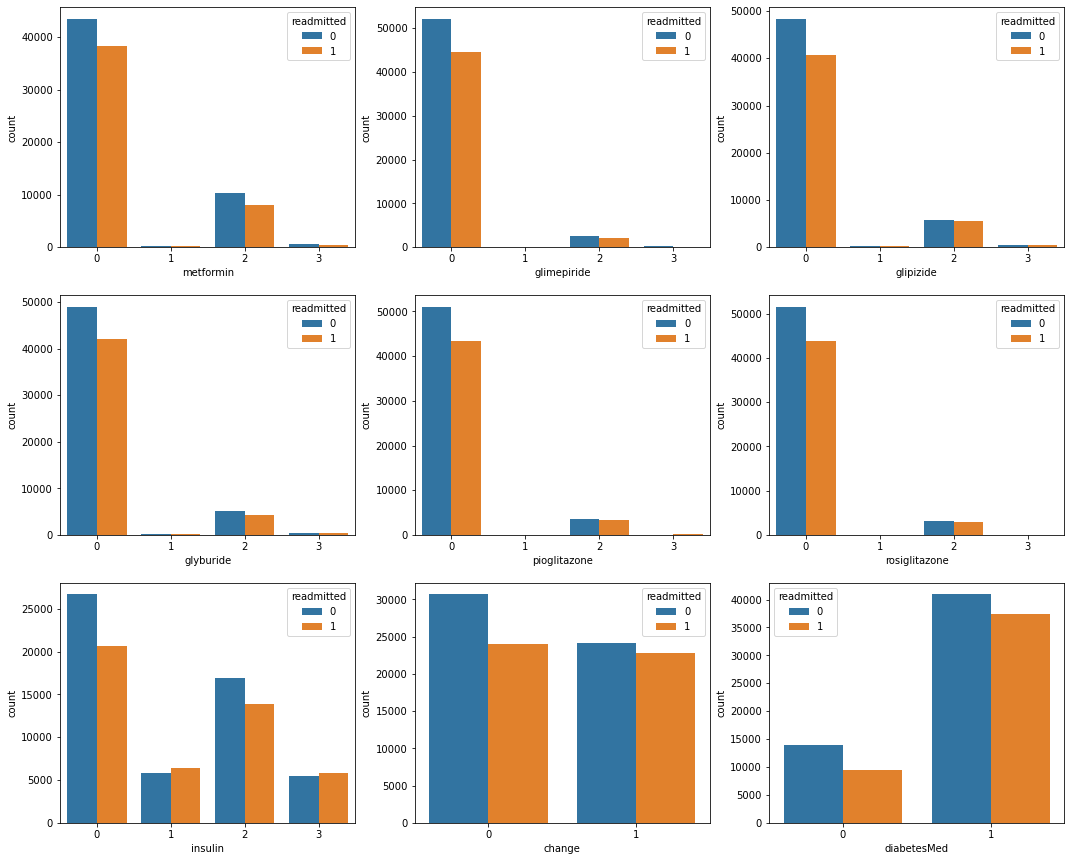

In [57]:
fig, ax = plt.subplots(3,3, figsize = (18,15))
i_0=10
for i in range(i_0, i_0+9):
    sns.countplot(data = diabetes_df, x = diabetes_df.columns[i], hue = "readmitted", ax = ax[(i-i_0)//3, (i-i_0)%3])

Widać pewną zależność z np. z insulin.

## Finalny zbiór danych

In [58]:
diabetes_df

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_disposition_id_23,discharge_disposition_id_30,admission_source_id_0,admission_source_id_1,admission_source_id_2,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_30
0,0,5,1,41,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,15,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0
2,0,25,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,1,0
3,1,35,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,1,0
4,1,45,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,75,3,51,0,16,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0
101762,0,85,5,33,3,18,0,0,1,9,...,0,0,0,0,0,0,1,0,0,0
101763,1,75,1,53,0,9,1,0,0,13,...,0,0,0,0,0,0,0,0,1,0
101764,0,85,10,45,2,21,0,0,1,9,...,0,0,0,0,0,0,0,0,1,0
